© 2024 Nokia
Licensed under the BSD 3 Clause Clear License  
SPDX-License-Identifier: BSD-3-Clause-Clear

In [1]:
import os
import pickle
import re

import pandas as pd
import scipy
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from fairness_utilities import *
from definitions import ROOT_DIR

from sklearn import metrics

import seaborn as sns
sns.set(font_scale = 1.5)

seed = 2
tf.random.set_seed(seed)
np.random.seed(seed)

import simclr_models
import simclr_utitlities

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

sns.set(style='white', context="poster", font='Work Sans Regural')

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


## MODEL SUMMARY

In [2]:
# Dataset-specific
# working_directory = 'SleepEEG/'
# data_folder = 'SleepEEG'
# data folder structure
data_folder = 'MIMIC'
# model folder structure
working_directory = 'MIMIC/'
#  -------------------------------------------------------------------------------------------------

# SimCLR finetuned models
# SS: 10
# subfolder = '20231211-111258_e100_esFalse_bs128_wTrue_f1_m_ss10'
# model_name = 'simclr.frozen.1.45.hdf5'
# frozen_layers = 1
# added_layers = 2
# tag = 'frozen1m10'
# SS: 20
# subfolder = '20231211-111328_e100_esFalse_bs128_wTrue_f1_m_ss20'
# model_name = 'simclr.frozen.1.35.hdf5'
# frozen_layers = 1
# added_layers = 2
# tag = 'frozen1m20'
# SS: 40
# subfolder = '20231211-111357_e100_esFalse_bs128_wTrue_f1_m_ss40'
# model_name = 'simclr.frozen.1.21.hdf5'
# frozen_layers = 1
# added_layers = 2
# tag = 'frozen1m40'
# SS: 60
# subfolder = '20231211-111428_e100_esFalse_bs128_wTrue_f1_m_ss60'
# model_name = 'simclr.frozen.1.18.hdf5'
# frozen_layers = 1
# added_layers = 2
# tag = 'frozen1m60'
# SS: 80
# subfolder = '20231211-111500_e100_esFalse_bs128_wTrue_f1_m_ss80'
# model_name = 'simclr.frozen.1.18.hdf5'
# frozen_layers = 1
# added_layers = 2
# tag = 'frozen1m80'
# SS: 100
# subfolder = '20231211-111533_e100_esFalse_bs128_wTrue_f1_m_ss100'
# model_name = 'simclr.frozen.1.09.hdf5'
# frozen_layers = 1
# added_layers = 2
# tag = 'frozen1m100'
# SS: 125
# subfolder = '20231213-142041_e100_esFalse_bs128_wTrue_f1_m_ss125'
# model_name = 'simclr.frozen.1.15.hdf5'
# frozen_layers = 1
# added_layers = 2
# tag = 'frozen1m125'
# S: 150
# subfolder = '20231213-143219_e100_esFalse_bs128_wTrue_f1_m_ss150'
# model_name = 'simclr.frozen.1.11.hdf5'
# frozen_layers = 1
# added_layers = 2
# tag = 'frozen1m150'

# -------------------------------------------------------------------------------------------------

# SUPERVISED
working_directory = '..\Supervised\MIMIC'
# # SS: 10
# subfolder = '20231213-112301_l2_e100_esFalse_bs64_wTrue_ss10'
# model_name = 'supervised.finetuned.0.43.hdf5'
# frozen_layers = ''
# added_layers = 2
# tag = 'supervised10'
# SS: 20
# subfolder = '20231213-112340_l2_e100_esFalse_bs64_wTrue_ss20'
# model_name = 'supervised.finetuned.0.47.hdf5'
# frozen_layers = ''
# added_layers = 2
# tag = 'supervised20'
# SS: 40
# subfolder = '20231213-112417_l2_e100_esFalse_bs64_wTrue_ss40'
# model_name = 'supervised.finetuned.0.53.hdf5'
# frozen_layers = ''
# added_layers = 2
# tag = 'supervised40'
# SS: 60
# subfolder = '20231213-112511_l2_e100_esFalse_bs64_wTrue_ss60'
# model_name = 'supervised.finetuned.0.53.hdf5'
# frozen_layers = ''
# added_layers = 2
# tag = 'supervised60'
# SS: 80
# subfolder = '20231213-112635_l2_e100_esFalse_bs64_wTrue_ss80'
# model_name = 'supervised.finetuned.0.56.hdf5'
# frozen_layers = ''
# added_layers = 2
# tag = 'supervised80'
# SS: 100
# subfolder = '20231213-112727_l2_e100_esFalse_bs64_wTrue_ss100'
# model_name = 'supervised.finetuned.0.55.hdf5'
# frozen_layers = ''
# added_layers = 2
# tag = 'supervised100'
# SS: 125
# subfolder = '20231213-141939_l2_e100_esFalse_bs64_wTrue_ss125'
# model_name = 'supervised.finetuned.0.59.hdf5'
# frozen_layers = ''
# added_layers = 2
# tag = 'supervised125'
# SS: 150
subfolder = '20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150'
model_name = 'supervised.finetuned.0.58.hdf5'
frozen_layers = ''
added_layers = 2
tag = 'supervised150'

In [3]:
# Dataset-specific
# working_directory = 'SleepEEG/'
# data_folder = 'SleepEEG'
# data folder structure
# data_folder = 'MIMIC'
# # model folder structure
# working_directory = 'MIMIC/'

# SimCLR finetuned models
# FROZEN: 3
# subfolder = '20230403-122444_e100_esFalse_bs128_wTrue_f3'
# image_folder = os.path.join(data_folder, 'img', subfolder)
# model_name = 'simclr.frozen.0.78.hdf5'
# frozen_layers = 3
# added_layers = 2
# tag = 'frozen3'
# FROZEN: 2 (f-m)
# subfolder = '20230403-122120_e100_esFalse_bs128_wTrue_f2'
# image_folder = os.path.join(data_folder, 'img', subfolder)
# model_name = 'simclr.frozen.0.69.hdf5'
# frozen_layers = 2
# added_layers = 2
# tag = 'frozen2'
# # FROZEN: 2 (f-l)
# subfolder = '20230403-120645_e100_esFalse_bs128_wTrue_f2_fl'
# image_folder = os.path.join(data_folder, 'img', subfolder)
# model_name = 'simclr.frozen.0.75.hdf5'
# frozen_layers = 2
# added_layers = 2
# tag = 'frozen2fl'
# # FROZEN: 1 (f)
# subfolder = '20230403-121747_e100_esFalse_bs128_wTrue_f1'
# image_folder = os.path.join(data_folder, 'img', subfolder)
# model_name = 'simclr.frozen.0.79.hdf5'
# frozen_layers = 1
# added_layers = 2
# tag = 'frozen1'
# # FROZEN: 1 (m)
# subfolder = '20230403-120904_e100_esFalse_bs128_wTrue_f1_m'
# image_folder = os.path.join(data_folder, 'img', subfolder)
# model_name = 'simclr.frozen.0.76.hdf5'
# frozen_layers = 1
# added_layers = 2
# tag = 'frozen1m'
# # FROZEN: 0
# subfolder = '20230403-121322_e100_esFalse_bs128_wTrue_f0'
# image_folder = os.path.join(data_folder, 'img', subfolder)
# model_name = 'simclr.frozen.0.77.hdf5'
# frozen_layers = 0
# added_layers = 2
# tag = 'frozen0'
# # SUPERVISED
# working_directory = '..\Supervised\MIMIC'
# subfolder = '20230403-133103_l2_e100_esFalse_bs128_wTrue'
# image_folder = os.path.join(working_directory, 'img', subfolder)
# model_name = 'supervised.finetuned.0.81.hdf5'
# frozen_layers = ''
# added_layers = 2
# tag = 'supervised'

image_folder = os.path.join(data_folder, 'img', subfolder)
pretrained_model = tf.keras.models.load_model(os.path.join(working_directory, subfolder, model_name), compile=False)  # compile=False as we use the model only for inference
if not os.path.exists(image_folder):
    os.makedirs(image_folder)
pretrained_model.summary()

Model: "supervised_baseline_model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 48, 76)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 48, 32)            58400     
_________________________________________________________________
dropout (Dropout)            (None, 48, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 48, 64)            32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 48, 96)            49248     
_________________________________________________________________
dropout_2 (Dropout)          (None, 48,

## DATA SHAPES

In [4]:
# Load preprocessed data
np_train = (np.load(os.path.join(data_folder, 'train_x.npy')),
           np.load(os.path.join(data_folder, 'train_y.npy')))
np_val = (np.load(os.path.join(data_folder, 'val_x.npy')),
           np.load(os.path.join(data_folder, 'val_y.npy')))
np_test = (np.load(os.path.join(data_folder, 'test_x.npy')),
           np.load(os.path.join(data_folder, 'test_y.npy')))

probs = pretrained_model.predict(np_test[0])
predictions = np.argmax(probs, axis=1)
# print(simclr_utitlities.evaluate_model_simple(pretrained_model.predict(np_test[0]), np_test[1], return_dict=True))

In [5]:
print("Train - Validation - Test Set Shapes:")
print("Train X: {} - Val X: {} - Test X: {}".format(np_train[0].shape, np_val[0].shape, np_test[0].shape))
print("Train y: {} - Val y: {} - Test y: {}".format(np_train[1].shape, np_val[1].shape, np_test[1].shape))

Train - Validation - Test Set Shapes:
Train X: (14681, 48, 76) - Val X: (3222, 48, 76) - Test X: (3236, 48, 76)
Train y: (14681, 2) - Val y: (3222, 2) - Test y: (3236, 2)


In [6]:
# The test set values agree with the ones reported in the original paper: https://arxiv.org/pdf/1703.07771.pdf
pd.Series(np_test[1][:,1]).value_counts()

0.0    2862
1.0     374
dtype: int64

In [7]:
os.chdir(ROOT_DIR)
subjects = pd.read_csv(os.path.join('datasets', data_folder, 'demographics_rich.csv'))
# subject IDs per train-validation-test set
train_listfile = pd.read_csv(os.path.join('datasets', data_folder, 'train_listfile.csv'))
val_listfile = pd.read_csv(os.path.join('datasets', data_folder, 'val_listfile.csv'))
test_listfile = pd.read_csv(os.path.join('datasets', data_folder, 'test_listfile.csv'))
# change back the working directory
os.chdir(os.path.join('code', 'baselines', 'SimCLR'))
subjects.head()

,SUBJECT_ID,LANGUAGE,INSURANCE,RELIGION,ETHNICITY,GENDER,AGE
0,22,NaN,Private,UNOBTAINABLE,WHITE,F,1
1,23,ENGL,Medicare,CATHOLIC,WHITE,M,0
2,24,NaN,Private,PROTESTANT QUAKER,WHITE,M,1
3,25,NaN,Private,UNOBTAINABLE,WHITE,M,1
4,26,NaN,Medicare,CATHOLIC,UNKNOWN/NOT SPECIFIED,M,0


In [8]:
train_listfile

,stay,y_true
0,12797_episode1_timeseries.csv,0
1,9027_episode1_timeseries.csv,0
2,40386_episode1_timeseries.csv,0
3,48770_episode1_timeseries.csv,0
4,14037_episode1_timeseries.csv,0
...,...,...
14676,50762_episode1_timeseries.csv,0
14677,12348_episode1_timeseries.csv,0
14678,71713_episode1_timeseries.csv,0
14679,69395_episode1_timeseries.csv,0


## PROTECTED ATTRIBUTE DISTRIBUTIONS

In [9]:
df = pd.concat([train_listfile, val_listfile, test_listfile])
print("Total rows: {}".format(df.shape[0]))
print(df.head(100))

Total rows: 21139
                             stay  y_true
0   12797_episode1_timeseries.csv       0
1    9027_episode1_timeseries.csv       0
2   40386_episode1_timeseries.csv       0
3   48770_episode1_timeseries.csv       0
4   14037_episode1_timeseries.csv       0
..                            ...     ...
95   7158_episode1_timeseries.csv       0
96  29457_episode1_timeseries.csv       0
97  26754_episode1_timeseries.csv       0
98  32263_episode1_timeseries.csv       0
99  15122_episode2_timeseries.csv       0

[100 rows x 2 columns]


In [10]:
# extract subject_id from stay
regex = r"(?:^\d+)"
df.loc[:, "SUBJECT_ID"] = df.stay.apply(lambda stay: re.search(regex, stay).group(0))
df.SUBJECT_ID = df.SUBJECT_ID.astype(int)
df.drop(['stay'], axis=1, inplace=True)
print(df.head(100))

    y_true  SUBJECT_ID
0        0       12797
1        0        9027
2        0       40386
3        0       48770
4        0       14037
..     ...         ...
95       0        7158
96       0       29457
97       0       26754
98       0       32263
99       0       15122

[100 rows x 2 columns]


In [11]:
len(pd.unique(df['SUBJECT_ID']))

18094

In [12]:
df.groupby('SUBJECT_ID').count().max()

y_true    21
dtype: int64

In [13]:
# join with demographics
df = df.merge(subjects, how='left', on='SUBJECT_ID')
print("Total rows after merging: {}".format(df.shape[0]))
print(df.head(100))

Total rows after merging: 21139
    y_true  SUBJECT_ID LANGUAGE INSURANCE           RELIGION  \
0        0       12797     ENGL  Medicare             JEWISH   
1        0        9027      NaN   Private       UNOBTAINABLE   
2        0       40386     ENGL  Medicare  PROTESTANT QUAKER   
3        0       48770     ENGL  Self Pay      NOT SPECIFIED   
4        0       14037      NaN   Private           CATHOLIC   
..     ...         ...      ...       ...                ...   
95       0        7158      NaN   Private  PROTESTANT QUAKER   
96       0       29457     ENGL   Private  PROTESTANT QUAKER   
97       0       26754     ENGL  Medicare           CATHOLIC   
98       0       32263     PTUN  Medicare      NOT SPECIFIED   
99       0       15122     ENGL  Medicare      NOT SPECIFIED   

                 ETHNICITY GENDER  AGE  
0                    WHITE      F    0  
1    UNKNOWN/NOT SPECIFIED      M    1  
2                    WHITE      F    0  
3                    WHITE      M  

In [14]:
# Calculate frequences
protected_attributes = ['LANGUAGE', 'INSURANCE', 'RELIGION', 'ETHNICITY', 'GENDER', 'AGE']
privileged_classes = [['ENGL'], ['Private'], ['CATHOLIC'], ['WHITE'], ['M'], [1]]

count_df = pd.concat(axis=0, ignore_index=True, objs=[
    df[protected_attribute].value_counts().reset_index(drop=False) for protected_attribute in protected_attributes
])

In [15]:
df["RELIGION"].value_counts().reset_index(drop=False)

,index,RELIGION
0,CATHOLIC,7828
1,NOT SPECIFIED,4106
2,PROTESTANT QUAKER,2743
3,UNOBTAINABLE,2254
4,JEWISH,2027
5,OTHER,1016
6,EPISCOPALIAN,306
7,GREEK ORTHODOX,188
8,CHRISTIAN SCIENTIST,126
9,BUDDHIST,89


In [16]:
count_df

,index,LANGUAGE,INSURANCE,RELIGION,ETHNICITY,GENDER,AGE
0,ENGL,11890.0,NaN,NaN,NaN,NaN,NaN
1,SPAN,432.0,NaN,NaN,NaN,NaN,NaN
2,RUSS,316.0,NaN,NaN,NaN,NaN,NaN
3,PTUN,257.0,NaN,NaN,NaN,NaN,NaN
4,CANT,160.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
124,AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGN...,NaN,NaN,NaN,1.0,NaN,NaN
125,M,NaN,NaN,NaN,NaN,11629.0,NaN
126,F,NaN,NaN,NaN,NaN,9510.0,NaN
127,0,NaN,NaN,NaN,NaN,NaN,11588.0


In [17]:
count_df = count_df.melt('index')
count_df.dropna(axis=0, inplace=True)
count_df.reset_index(inplace=True, drop=True)
# count_df["majority"] = np.where(count_df.index % 2, 0, 1)
# count_df.loc[:, "label"] = count_df.apply(lambda row: FRIENDLY_LABELS.get(row['variable']).get(row['index']), axis=1)

In [18]:
print(count_df.head(100))

                   index   variable    value
0                   ENGL   LANGUAGE  11890.0
1                   SPAN   LANGUAGE    432.0
2                   RUSS   LANGUAGE    316.0
3                   PTUN   LANGUAGE    257.0
4                   CANT   LANGUAGE    160.0
..                   ...        ...      ...
95       WHITE - RUSSIAN  ETHNICITY     73.0
96    BLACK/CAPE VERDEAN  ETHNICITY     66.0
97         BLACK/HAITIAN  ETHNICITY     39.0
98  MULTI RACE ETHNICITY  ETHNICITY     35.0
99            PORTUGUESE  ETHNICITY     33.0

[100 rows x 3 columns]


In [19]:
# keep only top-5 values per variable; rest group into other category
def append_row(df, row):
    return pd.concat([
                df,
                pd.DataFrame([row], columns=row.index)]
           ).reset_index(drop=True)

top_5_lang = count_df[count_df.variable == 'LANGUAGE'][:5]
rest_lang_sum = count_df[count_df.variable == 'LANGUAGE'][5:].value.sum()
new_row = pd.Series({"index": "OTHER", "variable": "LANGUAGE", "value": rest_lang_sum})
top_5_lang = append_row(top_5_lang, new_row)

top_5_rel = count_df[count_df.variable == 'RELIGION'][:5]
rest_rel_sum = count_df[count_df.variable == 'RELIGION'][5:].value.sum()
new_row = pd.Series({"index": "OTHER", "variable": "RELIGION", "value": rest_rel_sum})
top_5_rel = append_row(top_5_rel, new_row)

ethnicities_to_keep = [0, 1, 3, 6]  # WHITE, BLACK, HISPANIC, ASIAN
top_5_ethn = count_df[count_df.variable == 'ETHNICITY'].iloc[ethnicities_to_keep,:]
rest_ethn_sum = count_df[count_df.variable == 'ETHNICITY'].value.sum()-top_5_ethn.value.sum()
new_row = pd.Series({"index": "OTHER", "variable": "ETHNICITY", "value": rest_ethn_sum})
top_5_ethn = append_row(top_5_ethn, new_row)

count_df_merged = pd.concat([top_5_lang, top_5_rel, top_5_ethn, count_df[count_df.variable == 'GENDER'], count_df[count_df.variable == 'INSURANCE'], count_df[count_df.variable == 'AGE']], ignore_index=True, sort=False)

count_df_merged.head()

,index,variable,value
0,ENGL,LANGUAGE,11890.0
1,SPAN,LANGUAGE,432.0
2,RUSS,LANGUAGE,316.0
3,PTUN,LANGUAGE,257.0
4,CANT,LANGUAGE,160.0


In [20]:
top_5_ethn

,index,variable,value
0,WHITE,ETHNICITY,14866.0
1,BLACK/AFRICAN AMERICAN,ETHNICITY,1887.0
2,HISPANIC OR LATINO,ETHNICITY,505.0
3,ASIAN,ETHNICITY,308.0
4,OTHER,ETHNICITY,3573.0


In [21]:
# Change languages to official codes; PTUN is not a language
count_df_merged.loc[count_df_merged["index"] == "PTUN", "index"] = "N/A"
count_df_merged.loc[count_df_merged["index"] == "ENGL", "index"] = "EN"
count_df_merged.loc[count_df_merged["index"] == "SPAN", "index"] = "ES"
count_df_merged.loc[count_df_merged["index"] == "RUSS", "index"] = "RU"
count_df_merged.loc[count_df_merged["index"] == "CANT", "index"] = "YUE"
count_df_merged.head()

,index,variable,value
0,EN,LANGUAGE,11890.0
1,ES,LANGUAGE,432.0
2,RU,LANGUAGE,316.0
3,N/A,LANGUAGE,257.0
4,YUE,LANGUAGE,160.0


In [22]:
# sns.set_style('whitegrid')
# sns.set(font_scale = 1.5)
# sns.color_palette("tab10")
count_df_merged.loc[:, "label"] = count_df_merged['index'].apply(lambda v: "Protestant" if v=="PROTESTANT QUAKER" else ("Black" if v=="BLACK/AFRICAN AMERICAN" else ("Hispanic" if v=="HISPANIC OR LATINO" else ("Asian" if v=="ASIAN" else (str.capitalize(v) if isinstance(v, str) else ('<65' if v==1 else ('>=65' if v==0 else v)))))))
count_df_merged.loc[count_df_merged["variable"] == "LANGUAGE", "label"] = count_df_merged.loc[count_df_merged["variable"] == "LANGUAGE", "label"].str.upper()
# palette = {c: "#67a61f" if (c == "White") else "#d95f02" for c in count_df_merged["label"].unique()}
ratios = [6, 6, 5, 2, 5, 2]

In [23]:
count_df_merged = count_df_merged[count_df_merged.variable != "RELIGION"]
count_df_merged.loc[:, "Segment"] = count_df_merged["index"].apply(lambda i: "Majority" if (i=="EN" or i=="M" or i=="WHITE" or i=="Medicare" or i==0) else "Minority")
count_df_merged

,index,variable,value,label,Segment
0,EN,LANGUAGE,11890.0,EN,Majority
1,ES,LANGUAGE,432.0,ES,Minority
2,RU,LANGUAGE,316.0,RU,Minority
3,N/A,LANGUAGE,257.0,N/A,Minority
4,YUE,LANGUAGE,160.0,YUE,Minority
5,OTHER,LANGUAGE,664.0,OTHER,Minority
12,WHITE,ETHNICITY,14866.0,White,Majority
13,BLACK/AFRICAN AMERICAN,ETHNICITY,1887.0,Black,Minority
14,HISPANIC OR LATINO,ETHNICITY,505.0,Hispanic,Minority
15,ASIAN,ETHNICITY,308.0,Asian,Minority


In [24]:
ratios = [6, 5, 2, 5, 2]

C:\Users\syfan\PycharmProjects\TFC-pretraining\venv\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


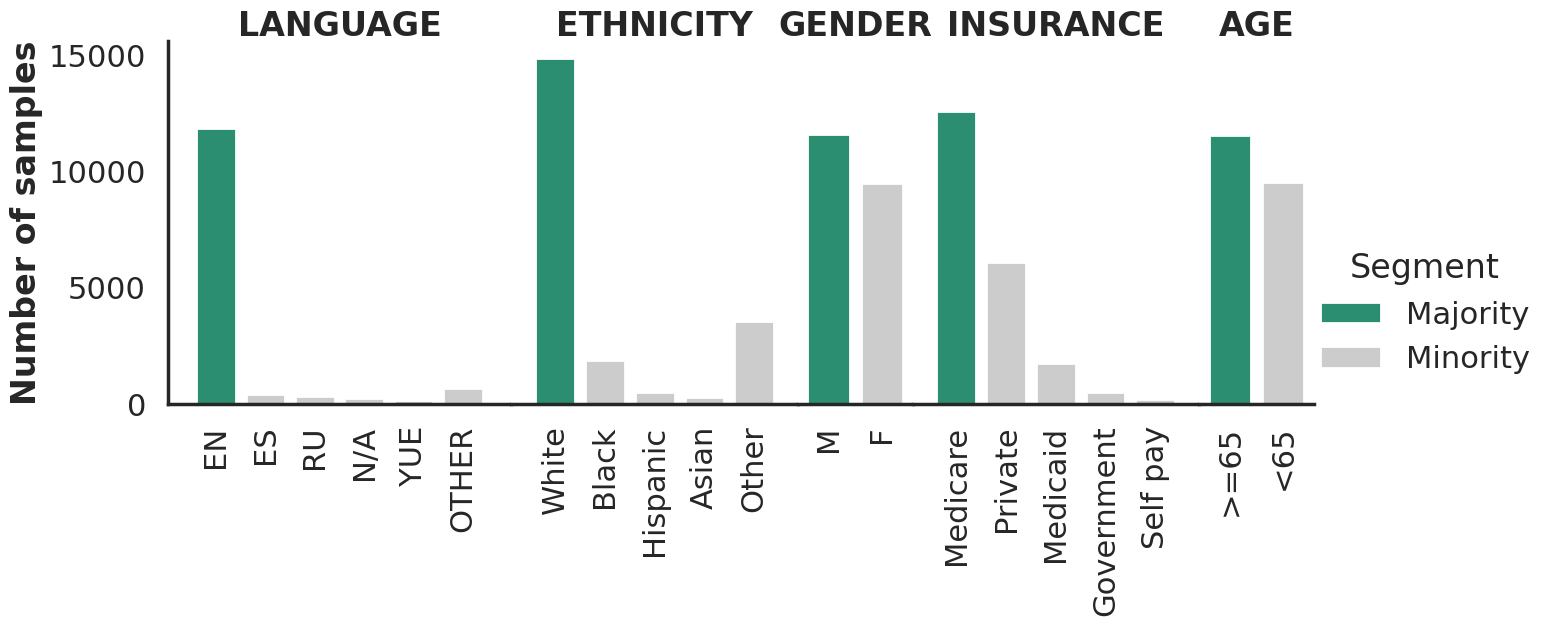

In [25]:
sns.set(style='white', context="poster", font='Work Sans Regural')
g = sns.catplot(data=count_df_merged[count_df_merged.index.notnull()], x="label", col="variable",  ci=None, y="value", kind='bar', sharex=False, aspect=.5, dodge=False, hue="Segment", palette=['#1c9e77', '#cccccc'], facet_kws={'gridspec_kws':{'width_ratios': ratios}})
# palette=['#67a61f', '#d95f02', '#1c9e77', '#e72a8a', '#7570b3', '#e6ab01']

g.set_titles("{col_name}")
g.set_ylabels('Number of samples')
g.set_xlabels('Protected Attribute')
g.set_xticklabels(rotation=90)
# plt.suptitle("Privileged vs. Unprivileged Group Representation (#Samples)")
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_xlabel(ax.get_title(), fontdict={'weight': 'bold'})
    ax.set_title('')
    ax.margins(x=0.1) # slightly more margin as a separation
    ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
    ax.xaxis.set_label_position('top')
plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)
# plt.legend(title="Segment", labels=['Minority', 'Majority'])
# plt.show()

plt.savefig(os.path.join(image_folder, 'representationBar.pdf'), format='pdf', bbox_inches="tight")
plt.savefig(os.path.join(image_folder, 'representationBar.png'))

In [26]:
image_folder

'MIMIC\\img\\20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150'

In [27]:
# get numbers
# count_df_merged.groupby('variable').
count_df_merged['percentage'] = count_df_merged['value'] / count_df_merged.groupby('variable')['value'].transform('sum')
count_df_merged

,index,variable,value,label,Segment,percentage
0,EN,LANGUAGE,11890.0,EN,Majority,0.866681
1,ES,LANGUAGE,432.0,ES,Minority,0.031489
2,RU,LANGUAGE,316.0,RU,Minority,0.023034
3,N/A,LANGUAGE,257.0,N/A,Minority,0.018733
4,YUE,LANGUAGE,160.0,YUE,Minority,0.011663
5,OTHER,LANGUAGE,664.0,OTHER,Minority,0.048400
12,WHITE,ETHNICITY,14866.0,White,Majority,0.703250
13,BLACK/AFRICAN AMERICAN,ETHNICITY,1887.0,Black,Minority,0.089266
14,HISPANIC OR LATINO,ETHNICITY,505.0,Hispanic,Minority,0.023889
15,ASIAN,ETHNICITY,308.0,Asian,Minority,0.014570


In [54]:
# df_merged.loc[:, "ETHNICITY_GROUPED"] = df_merged.ETHNICITY.apply(
#     lambda v: "White" if "WHITE"in v else 
#     ("Black" if "BLACK" in v else 
#      ("Asian" if "ASIAN" in v else
#       ("Hispanic" if "HISPANIC" in v else 
#        "Other")))
# )
# df_merged.groupby('ETHNICITY_GROUPED')['y_true'].value_counts(normalize=True)

ETHNICITY_GROUPED  y_true
Asian              0         0.862348
                   1         0.137652
Black              0         0.907601
                   1         0.092399
Hispanic           0         0.919473
                   1         0.080527
Other              0         0.813859
                   1         0.186141
White              0         0.870710
                   1         0.129290
Name: y_true, dtype: float64

## OVERALL PERFORMANCE

In [154]:
# Overall performance
print("\n--- Train Performance Overall ---")
print(simclr_utitlities.evaluate_model_simple(pretrained_model.predict(np_train[0]), np_train[1], return_dict=True))
print("\n--- Validation Performance Overall ---")
print(simclr_utitlities.evaluate_model_simple(pretrained_model.predict(np_val[0]), np_val[1], return_dict=True))
print("\n--- Test Performance Overall ---")
test_performance = simclr_utitlities.evaluate_model_simple(pretrained_model.predict(np_test[0]), np_test[1], return_dict=True)
print(test_performance)


--- Train Performance Overall ---
{'Accuracy': 0.8002860840542197, 'Balanced Accuracy': 0.7344537786140874, 'AUROC': 0.8126895444304794, 'AUPRC Macro': 0.4259987821080605, 'AUPRC Micro': 0.4259987821080605, 'Confusion Matrix': array([[10469,  2225],
       [  707,  1280]], dtype=int64), 'F1 Macro': 0.6716502748713824, 'F1 Micro': 0.8002860840542197, 'F1 Weighted': 0.8215364005565101, 'Precision': 0.6509660118431896, 'Recall': 0.7344537786140874, 'Kappa': 0.35464437929688564}

--- Validation Performance Overall ---
{'Accuracy': 0.7886405959031657, 'Balanced Accuracy': 0.7259124916851624, 'AUROC': 0.7980852822434584, 'AUPRC Macro': 0.4174165781681906, 'AUPRC Micro': 0.4174165781681906, 'Confusion Matrix': array([[2262,  524],
       [ 157,  279]], dtype=int64), 'F1 Macro': 0.6597637306277955, 'F1 Micro': 0.7886405959031657, 'F1 Weighted': 0.8124922396530704, 'Precision': 0.641272110528058, 'Recall': 0.7259124916851624, 'Kappa': 0.3334485677016089}

--- Test Performance Overall ---
{'Acc

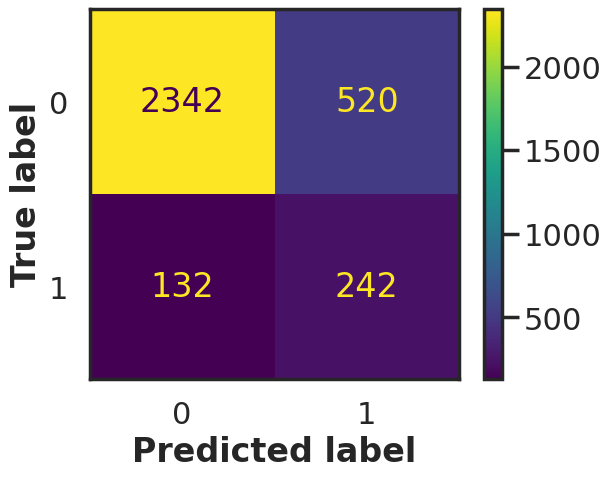

In [155]:
from sklearn.metrics import ConfusionMatrixDisplay

all_metrics = simclr_utitlities.evaluate_model_simple(pretrained_model.predict(np_test[0]), np_test[1], return_dict=True)
cm = all_metrics.get("Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
disp.figure_.savefig(os.path.join(image_folder, 'confusion_matrix.pdf'))

In [156]:
# overall
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1], pretrained_model.predict(np_test[0]), metric='AUROC')
print("Test Set AUC-ROC:\nAUC={} [CI {}-{}]".format(
    all_metrics.get("AUROC"),
    low_CI_binary,
    high_CI_binary
))
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1], pretrained_model.predict(np_test[0]), metric='AUPRC Micro')
print("Test Set AUC-PRC:\nAUC-PRC={} [CI {}-{}]".format(
    all_metrics.get("AUPRC"),
    low_CI_binary,
    high_CI_binary
))

Test Set AUC-ROC:
AUC=0.8063543313265844 [CI 0.7846639713323328-0.82830079836159]
Test Set AUC-PRC:
AUC-PRC=None [CI 0.32906113154104744-0.42804083939780735]


In [157]:
import tensorflow.keras.backend as K

trainable_count = np.sum([K.count_params(w) for w in pretrained_model.trainable_weights])
metrics_ci = []
averages_ci = []
lows_ci = []
highs_ci = []
for metric in all_metrics:
    if (metric == "Confusion Matrix") or (metric == "Kappa"):
        continue
    low_CI_binary, high_CI_binary = get_ci_auc(np_test[1], pretrained_model.predict(np_test[0]), metric=metric)
    metrics_ci.append(metric)
    averages_ci.append(all_metrics.get(metric))
    highs_ci.append(high_CI_binary)
    lows_ci.append(low_CI_binary)
print(metrics_ci)
all_metrics_ci = pd.DataFrame({'metric': metrics_ci, 'value': averages_ci, 'low_ci': lows_ci, 'high_ci': highs_ci, 'parameters': trainable_count, 'model_name': model_name, 'subfolder': subfolder, 'added_layers': added_layers, 'frozen_layers': frozen_layers, 'tag': tag})

['Accuracy', 'Balanced Accuracy', 'AUROC', 'AUPRC Macro', 'AUPRC Micro', 'F1 Macro', 'F1 Micro', 'F1 Weighted', 'Precision', 'Recall']


In [158]:
all_metrics_ci.to_csv(os.path.join(working_directory, subfolder, model_name.replace('.hdf5', '_ci_metrics.csv')), index=False)
all_metrics_ci.head(10)

,metric,value,low_ci,high_ci,parameters,model_name,subfolder,added_layers,frozen_layers,tag
0,Accuracy,0.798517,0.786465,0.812732,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
1,Balanced Accuracy,0.732684,0.705524,0.755430,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
2,AUROC,0.806354,0.782822,0.829786,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
3,AUPRC Macro,0.376946,0.326384,0.424864,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
4,AUPRC Micro,0.376946,0.328891,0.429177,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
5,F1 Macro,0.651934,0.628721,0.670754,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
6,F1 Micro,0.798517,0.785229,0.812114,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
7,F1 Weighted,0.825600,0.813885,0.836954,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
8,Precision,0.632115,0.615017,0.649233,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
9,Recall,0.732684,0.707556,0.757887,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150


In [159]:
# logging results
# results = pd.DataFrame(columns=['model', 'aucroc', 'gender_best', 'gender_best_auc', 'gender_best_delta', 'gender_worst', 'gender_worst_auc', 'gender_worst_delta'])
results = {'model': subfolder, 'auc': test_performance.get('AUROC'), 'protected_attributes': {}}

## BIAS ANALYSIS

In [160]:
sns.set(font_scale = 1)

In [161]:
test_listfile.head(20)

,stay,y_true
0,10011_episode1_timeseries.csv,1
1,10026_episode1_timeseries.csv,0
2,10030_episode1_timeseries.csv,0
3,10042_episode1_timeseries.csv,0
4,10094_episode1_timeseries.csv,0
5,10094_episode2_timeseries.csv,1
6,1009_episode1_timeseries.csv,0
7,10102_episode1_timeseries.csv,1
8,10149_episode1_timeseries.csv,0
9,10149_episode2_timeseries.csv,0


In [162]:
# Get subject from test
test_listfile.loc[:, "subject"] = test_listfile.stay.apply(lambda stay: stay.split("_")[0]).astype(int)
test_listfile.head()

,stay,y_true,subject
0,10011_episode1_timeseries.csv,1,10011
1,10026_episode1_timeseries.csv,0,10026
2,10030_episode1_timeseries.csv,0,10030
3,10042_episode1_timeseries.csv,0,10042
4,10094_episode1_timeseries.csv,0,10094


In [163]:
# merge demographics in test df
test_listfile = test_listfile.merge(subjects, left_on="subject", right_on="SUBJECT_ID", how="left")
test_listfile.head()

,stay,y_true,subject,SUBJECT_ID,LANGUAGE,INSURANCE,RELIGION,ETHNICITY,GENDER,AGE
0,10011_episode1_timeseries.csv,1,10011,10011,NaN,Private,CATHOLIC,UNKNOWN/NOT SPECIFIED,F,1
1,10026_episode1_timeseries.csv,0,10026,10026,NaN,Medicare,OTHER,WHITE,F,0
2,10030_episode1_timeseries.csv,0,10030,10030,NaN,Medicare,CATHOLIC,WHITE,M,0
3,10042_episode1_timeseries.csv,0,10042,10042,NaN,Medicare,UNOBTAINABLE,WHITE,M,0
4,10094_episode1_timeseries.csv,0,10094,10094,NaN,Medicare,UNOBTAINABLE,BLACK/AFRICAN AMERICAN,M,0


In [164]:
print("Test rows with null demograpphics: {} ({}%)".format(test_listfile.SUBJECT_ID.isna().sum(), test_listfile.SUBJECT_ID.isna().sum()/test_listfile.shape[0]))
test_listfile.drop(columns=['SUBJECT_ID'], inplace=True)
test_listfile.head()

Test rows with null demograpphics: 0 (0.0%)


,stay,y_true,subject,LANGUAGE,INSURANCE,RELIGION,ETHNICITY,GENDER,AGE
0,10011_episode1_timeseries.csv,1,10011,NaN,Private,CATHOLIC,UNKNOWN/NOT SPECIFIED,F,1
1,10026_episode1_timeseries.csv,0,10026,NaN,Medicare,OTHER,WHITE,F,0
2,10030_episode1_timeseries.csv,0,10030,NaN,Medicare,CATHOLIC,WHITE,M,0
3,10042_episode1_timeseries.csv,0,10042,NaN,Medicare,UNOBTAINABLE,WHITE,M,0
4,10094_episode1_timeseries.csv,0,10094,NaN,Medicare,UNOBTAINABLE,BLACK/AFRICAN AMERICAN,M,0


In [165]:
test_listfile.loc[:, "y_pred"] = predictions
test_listfile.head()

,stay,y_true,subject,LANGUAGE,INSURANCE,RELIGION,ETHNICITY,GENDER,AGE,y_pred
0,10011_episode1_timeseries.csv,1,10011,NaN,Private,CATHOLIC,UNKNOWN/NOT SPECIFIED,F,1,1
1,10026_episode1_timeseries.csv,0,10026,NaN,Medicare,OTHER,WHITE,F,0,0
2,10030_episode1_timeseries.csv,0,10030,NaN,Medicare,CATHOLIC,WHITE,M,0,0
3,10042_episode1_timeseries.csv,0,10042,NaN,Medicare,UNOBTAINABLE,WHITE,M,0,0
4,10094_episode1_timeseries.csv,0,10094,NaN,Medicare,UNOBTAINABLE,BLACK/AFRICAN AMERICAN,M,0,1


In [166]:
# Indicatively testing performance on publicly insured (1 for majority) versus privately insured (0 for minority) subjects
test_listfile_Medicare = test_listfile[test_listfile.INSURANCE == "Medicare"]
test_listfile_Private = test_listfile[test_listfile.INSURANCE == "Private"]
test_listfile_Medicaid = test_listfile[test_listfile.INSURANCE == "Medicaid"]
test_listfile_Government = test_listfile[test_listfile.INSURANCE == "Government"]
test_listfile_Self = test_listfile[test_listfile.INSURANCE == "Self Pay"]

In [167]:
# Overall performance
print("\n--- Train Performance Overall ---")
train_listfile.loc[:, "y_pred"] = np.argmax(pretrained_model.predict(np_train[0]),axis=1)
print(simclr_utitlities.evaluate_model_simple(pretrained_model.predict(np_train[0]), np_train[1], return_dict=True))
print("\n--- Validation Performance Overall ---")
val_listfile.loc[:, "y_pred"] = np.argmax(pretrained_model.predict(np_val[0]),axis=1)
print(simclr_utitlities.evaluate_model_simple(pretrained_model.predict(np_val[0]), np_val[1], return_dict=True))
print("\n--- Test Performance Overall ---")
print(simclr_utitlities.evaluate_model_simple(pretrained_model.predict(np_test[0]), np_test[1], return_dict=True))


--- Train Performance Overall ---
{'Accuracy': 0.8002860840542197, 'Balanced Accuracy': 0.7344537786140874, 'AUROC': 0.8126895444304794, 'AUPRC Macro': 0.4259987821080605, 'AUPRC Micro': 0.4259987821080605, 'Confusion Matrix': array([[10469,  2225],
       [  707,  1280]], dtype=int64), 'F1 Macro': 0.6716502748713824, 'F1 Micro': 0.8002860840542197, 'F1 Weighted': 0.8215364005565101, 'Precision': 0.6509660118431896, 'Recall': 0.7344537786140874, 'Kappa': 0.35464437929688564}

--- Validation Performance Overall ---
{'Accuracy': 0.7886405959031657, 'Balanced Accuracy': 0.7259124916851624, 'AUROC': 0.7980852822434584, 'AUPRC Macro': 0.4174165781681906, 'AUPRC Micro': 0.4174165781681906, 'Confusion Matrix': array([[2262,  524],
       [ 157,  279]], dtype=int64), 'F1 Macro': 0.6597637306277955, 'F1 Micro': 0.7886405959031657, 'F1 Weighted': 0.8124922396530704, 'Precision': 0.641272110528058, 'Recall': 0.7259124916851624, 'Kappa': 0.3334485677016089}

--- Test Performance Overall ---
{'Acc

In [168]:
# preparing for performance conditioned on protected attributes logging
con_metrics = []
con_protected_attributes = []
con_max_groups = []
con_max_values = []
con_min_groups = []
con_min_values = []
con_max_deltas = []
con_min_deltas = []

## Performance conditioned on Insurance Type

In [169]:
sns.set(style='white', font='Work Sans Regural')

In [170]:
# Fairness Comparisons conditioned on Insurance Type
print("\n--- Performance on Medicare Insured Subjects ---")
print(simclr_utitlities.evaluate_model_simple(pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Medicare"]), np_test[1][test_listfile.INSURANCE == "Medicare"], return_dict=True))
print("\n--- Performance on Private Insured Subjects ---")
print(simclr_utitlities.evaluate_model_simple(pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Private"]), np_test[1][test_listfile.INSURANCE == "Private"], return_dict=True))
print("\n--- Performance on Medicaid Insured Subjects ---")
print(simclr_utitlities.evaluate_model_simple(pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Medicaid"]), np_test[1][test_listfile.INSURANCE == "Medicaid"], return_dict=True))
print("\n--- Performance on Government Insured Subjects ---")
print(simclr_utitlities.evaluate_model_simple(pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Government"]), np_test[1][test_listfile.INSURANCE == "Government"], return_dict=True))
print("\n--- Performance on Self-Insured Subjects ---")
print(simclr_utitlities.evaluate_model_simple(pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Self Pay"]), np_test[1][test_listfile.INSURANCE == "Self Pay"], return_dict=True))


--- Performance on Medicare Insured Subjects ---
{'Accuracy': 0.791907514450867, 'Balanced Accuracy': 0.7240600609175709, 'AUROC': 0.7977393870169427, 'AUPRC Macro': 0.4299726189956703, 'AUPRC Micro': 0.4299726189956703, 'Confusion Matrix': array([[1346,  302],
       [  94,  161]], dtype=int64), 'F1 Macro': 0.6601148123024521, 'F1 Micro': 0.791907514450867, 'F1 Weighted': 0.8150407482456944, 'Precision': 0.6412272018238541, 'Recall': 0.7240600609175709, 'Kappa': 0.33324013646852313}

--- Performance on Private Insured Subjects ---
{'Accuracy': 0.8179959100204499, 'Balanced Accuracy': 0.7583820002085724, 'AUROC': 0.8302482010637189, 'AUPRC Macro': 0.3341693745828104, 'AUPRC Micro': 0.3341693745828104, 'Confusion Matrix': array([[741, 151],
       [ 27,  59]], dtype=int64), 'F1 Macro': 0.645709866492999, 'F1 Micro': 0.8179959100204498, 'F1 Weighted': 0.8493206452072591, 'Precision': 0.6228980654761904, 'Recall': 0.7583820002085724, 'Kappa': 0.3129203372170124}

--- Performance on Medic

In [171]:
# ROC curves
MAX_AUC = -1
MAX_GROUP = ''
MIN_AUC = 1.1
MIN_GROUP = ''

In [172]:
def check_min_max(auc, group):
    global MAX_AUC, MAX_GROUP, MIN_AUC, MIN_GROUP
    if MAX_AUC < auc:
        MAX_AUC = auc
        MAX_GROUP = group
    if MIN_AUC > auc:
        MIN_AUC = auc
        MIN_GROUP = group

# preparing for performance conditioned on protected attributes logging
def append_row(general_auc, protected_attribute, metric='AUROC'):
    con_metrics.append(metric)
    con_protected_attributes.append(protected_attribute)
    con_max_groups.append(MAX_GROUP)
    con_max_values.append(MAX_AUC)
    con_min_groups.append(MIN_GROUP)
    con_min_values.append(MIN_AUC)
    con_max_deltas.append(MAX_AUC-general_auc)
    con_min_deltas.append(MIN_AUC-general_auc)

def reset_min_max():
    global MAX_AUC, MAX_GROUP, MIN_AUC, MIN_GROUP
    MAX_AUC = -1
    MAX_GROUP = ''
    MIN_AUC = 1.1
    MIN_GROUP = ''

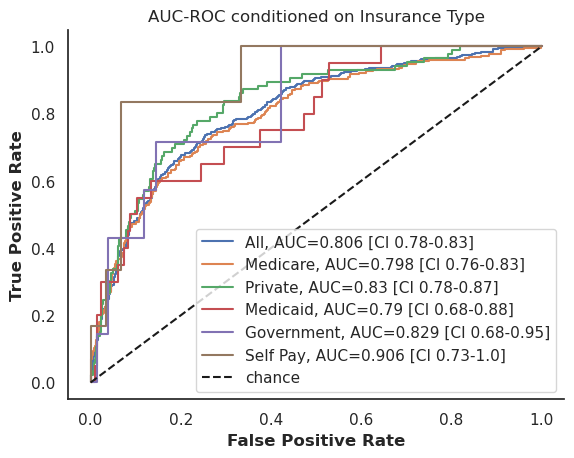

In [173]:
# ALL
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][:,1],
    pretrained_model.predict(np_test[0])[:,1]
)
general_auc = np.round(metrics.roc_auc_score(np_test[1][:,1], pretrained_model.predict(np_test[0])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1], pretrained_model.predict(np_test[0]), metric='AUROC')
plt.plot(fpr, tpr, label="All, AUC={} [CI {}-{}]".format(str(general_auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))

# MEDICARE
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.INSURANCE == "Medicare"][:,1],
    pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Medicare"])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.INSURANCE == "Medicare",1], pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Medicare"])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.INSURANCE == "Medicare"], pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Medicare"]), metric='AUROC')
plt.plot(fpr, tpr, label="Medicare, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "Medicare")

# PRIVATE
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.INSURANCE == "Private"][:,1],
    pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Private"])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.INSURANCE == "Private",1], pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Private"])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.INSURANCE == "Private"], pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Private"]), metric='AUROC')
plt.plot(fpr, tpr, label="Private, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "Private")

# MEDICAID
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.INSURANCE == "Medicaid"][:,1],
    pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Medicaid"])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.INSURANCE == "Medicaid",1], pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Medicaid"])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.INSURANCE == "Medicaid"], pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Medicaid"]), metric='AUROC')
plt.plot(fpr, tpr, label="Medicaid, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "Medicaid")

# GOVERNMENT
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.INSURANCE == "Government"][:,1],
    pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Government"])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.INSURANCE == "Government",1], pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Government"])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.INSURANCE == "Government"], pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Government"]), metric='AUROC')
plt.plot(fpr, tpr, label="Government, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "Government")

# SELF PAY
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.INSURANCE == "Self Pay"][:,1],
    pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Self Pay"])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.INSURANCE == "Self Pay",1], pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Self Pay"])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.INSURANCE == "Self Pay"], pretrained_model.predict(np_test[0][test_listfile.INSURANCE == "Self Pay"]), metric='AUROC')
plt.plot(fpr, tpr, label="Self Pay, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "Self Pay")

plt.plot([0, 1], [0, 1], 'k--', label='chance')  # random predictions curve

#create ROC curve
plt.title('AUC-ROC conditioned on Insurance Type')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(False)
sns.despine()
plt.legend(loc='lower right')
plt.savefig(os.path.join(image_folder, 'insurance.pdf'), bbox_inches='tight')

In [174]:
# append row to log file arrays
append_row(general_auc, 'INSURANCE')
reset_min_max()

## Performance conditioned on Gender

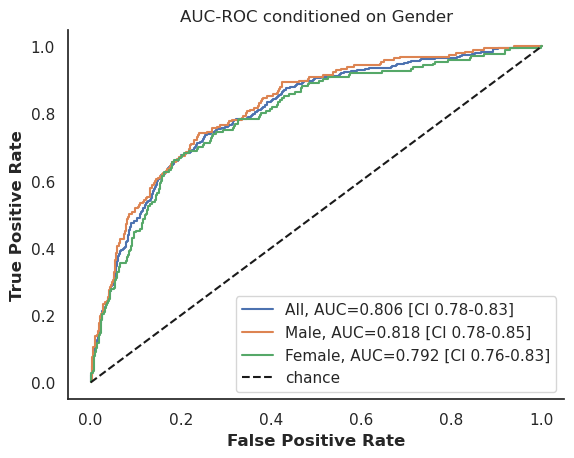

In [175]:
# ROC curves
# ALL
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][:,1],
    pretrained_model.predict(np_test[0])[:,1]
)
general_auc = np.round(metrics.roc_auc_score(np_test[1][:,1], pretrained_model.predict(np_test[0])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1], pretrained_model.predict(np_test[0]), metric='AUROC')
plt.plot(fpr, tpr, label="All, AUC={} [CI {}-{}]".format(str(general_auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))

# MALE
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.GENDER == "M"][:,1],
    pretrained_model.predict(np_test[0][test_listfile.GENDER == "M"])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.GENDER == "M", 1], pretrained_model.predict(np_test[0][test_listfile.GENDER == "M"])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.GENDER == "M"], pretrained_model.predict(np_test[0][test_listfile.GENDER == "M"]), metric='AUROC')
plt.plot(fpr, tpr, label="Male, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "Male")

# FEMALE
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.GENDER == "F"][:,1],
    pretrained_model.predict(np_test[0][test_listfile.GENDER == "F"])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.GENDER == "F", 1], pretrained_model.predict(np_test[0][test_listfile.GENDER == "F"])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.GENDER == "F"], pretrained_model.predict(np_test[0][test_listfile.GENDER == "F"]), metric='AUROC')
plt.plot(fpr, tpr, label="Female, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "Female")

plt.plot([0, 1], [0, 1], 'k--', label='chance')  # random predictions curve

#create ROC curve
plt.title('AUC-ROC conditioned on Gender')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(False)
sns.despine()
plt.legend(loc='lower right')
plt.savefig(os.path.join(image_folder, 'gender.pdf'), bbox_inches='tight')

In [176]:
# append row to log file arrays
append_row(general_auc, 'GENDER')
reset_min_max()

## Performance conditioned on Ethnicity

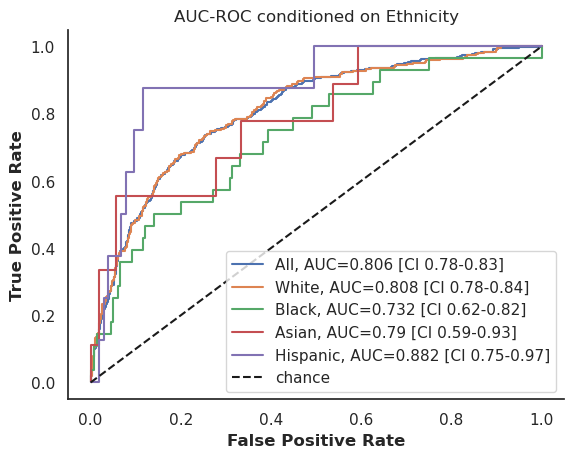

In [177]:
# test_listfile.ETHNICITY.value_counts()[:10].index.tolist()
# test_listfile.ETHNICITY.value_counts()
# ROC curves
# ALL
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][:,1],
    pretrained_model.predict(np_test[0])[:,1]
)
general_auc = np.round(metrics.roc_auc_score(np_test[1][:,1], pretrained_model.predict(np_test[0])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1], pretrained_model.predict(np_test[0]), metric='AUROC')
plt.plot(fpr, tpr, label="All, AUC={} [CI {}-{}]".format(str(general_auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))

# WHITE
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.ETHNICITY.str.contains("WHITE")][:,1],
    pretrained_model.predict(np_test[0][test_listfile.ETHNICITY.str.contains("WHITE")])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.ETHNICITY.str.contains("WHITE"), 1], pretrained_model.predict(np_test[0][test_listfile.ETHNICITY.str.contains("WHITE")])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.ETHNICITY.str.contains("WHITE")], pretrained_model.predict(np_test[0][test_listfile.ETHNICITY.str.contains("WHITE")]), metric='AUROC')
plt.plot(fpr, tpr, label="White, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "White")

# BLACK
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.ETHNICITY.str.contains("BLACK")][:,1],
    pretrained_model.predict(np_test[0][test_listfile.ETHNICITY.str.contains("BLACK")])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.ETHNICITY.str.contains("BLACK"), 1], pretrained_model.predict(np_test[0][test_listfile.ETHNICITY.str.contains("BLACK")])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.ETHNICITY.str.contains("BLACK")], pretrained_model.predict(np_test[0][test_listfile.ETHNICITY.str.contains("BLACK")]), metric='AUROC')
plt.plot(fpr, tpr, label="Black, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "Black")

# ASIAN
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.ETHNICITY.str.contains("ASIAN")][:,1],
    pretrained_model.predict(np_test[0][test_listfile.ETHNICITY.str.contains("ASIAN")])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.ETHNICITY.str.contains("ASIAN"), 1], pretrained_model.predict(np_test[0][test_listfile.ETHNICITY.str.contains("ASIAN")])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.ETHNICITY.str.contains("ASIAN")], pretrained_model.predict(np_test[0][test_listfile.ETHNICITY.str.contains("ASIAN")]), metric='AUROC')
plt.plot(fpr, tpr, label="Asian, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "Asian")

# HISPANIC/LATINO
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.ETHNICITY.str.contains("HISPANIC")][:,1],
    pretrained_model.predict(np_test[0][test_listfile.ETHNICITY.str.contains("HISPANIC")])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.ETHNICITY.str.contains("HISPANIC"), 1], pretrained_model.predict(np_test[0][test_listfile.ETHNICITY.str.contains("HISPANIC")])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.ETHNICITY.str.contains("HISPANIC")], pretrained_model.predict(np_test[0][test_listfile.ETHNICITY.str.contains("HISPANIC")]), metric='AUROC')
plt.plot(fpr, tpr, label="Hispanic, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "Hispanic/Latino")

plt.plot([0, 1], [0, 1], 'k--', label='chance')  # random predictions curve

#create ROC curve
plt.title('AUC-ROC conditioned on Ethnicity')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(False)
sns.despine()
plt.legend(loc='lower right')
plt.savefig(os.path.join(image_folder, 'ethnicity.pdf'), bbox_inches='tight')

In [178]:
# append row to log file arrays
append_row(general_auc, 'ETHNICITY')
reset_min_max()

## Performance conditioned on Language

In [179]:
test_listfile.LANGUAGE = test_listfile.LANGUAGE.apply(lambda l: l if l=="ENGL" else "OTHER")
test_listfile.LANGUAGE.value_counts()

ENGL     1795
OTHER    1441
Name: LANGUAGE, dtype: int64

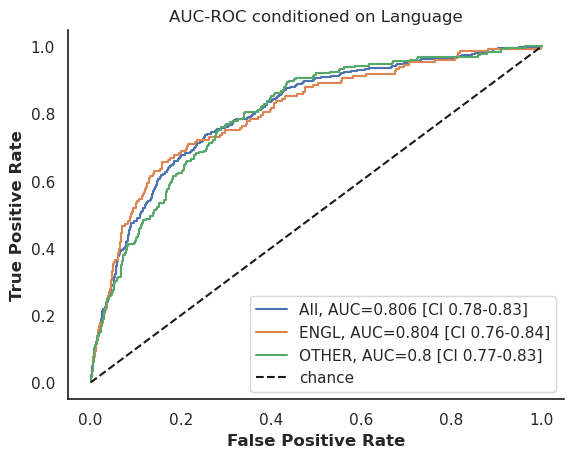

In [180]:
# ROC curves
# ALL
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][:,1],
    pretrained_model.predict(np_test[0])[:,1]
)
general_auc = np.round(metrics.roc_auc_score(np_test[1][:,1], pretrained_model.predict(np_test[0])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1], pretrained_model.predict(np_test[0]), metric='AUROC')
plt.plot(fpr, tpr, label="All, AUC={} [CI {}-{}]".format(str(general_auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))

# ENGL
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.LANGUAGE == "ENGL"][:,1],
    pretrained_model.predict(np_test[0][test_listfile.LANGUAGE == "ENGL"])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.LANGUAGE == "ENGL", 1], pretrained_model.predict(np_test[0][test_listfile.LANGUAGE == "ENGL"])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.LANGUAGE == "ENGL"], pretrained_model.predict(np_test[0][test_listfile.LANGUAGE == "ENGL"]), metric='AUROC')
plt.plot(fpr, tpr, label="ENGL, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "ENGL")

# OTHER
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.LANGUAGE == "OTHER"][:,1],
    pretrained_model.predict(np_test[0][test_listfile.LANGUAGE == "OTHER"])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.LANGUAGE == "OTHER", 1], pretrained_model.predict(np_test[0][test_listfile.LANGUAGE == "OTHER"])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.LANGUAGE == "OTHER"], pretrained_model.predict(np_test[0][test_listfile.LANGUAGE == "OTHER"]), metric='AUROC')
plt.plot(fpr, tpr, label="OTHER, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "OTHER")

plt.plot([0, 1], [0, 1], 'k--', label='chance')  # random predictions curve

#create ROC curve
plt.title('AUC-ROC conditioned on Language')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(False)
sns.despine()
plt.legend(loc='lower right')
plt.savefig(os.path.join(image_folder, 'language.pdf'), bbox_inches='tight')

## Performance conditioned on Age

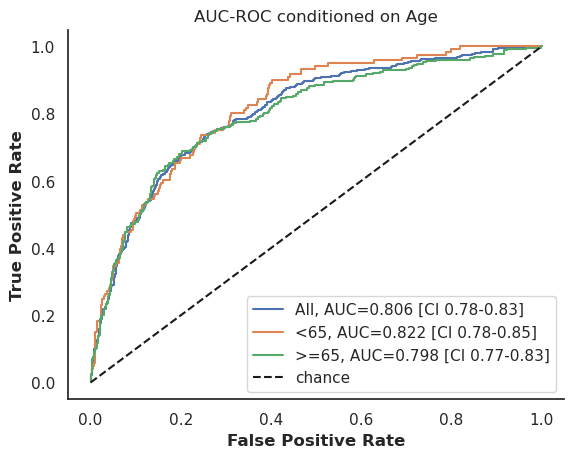

In [181]:
# ROC curves
# ALL
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][:,1],
    pretrained_model.predict(np_test[0])[:,1]
)
general_auc = np.round(metrics.roc_auc_score(np_test[1][:,1], pretrained_model.predict(np_test[0])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1], pretrained_model.predict(np_test[0]), metric='AUROC')
plt.plot(fpr, tpr, label="All, AUC={} [CI {}-{}]".format(str(general_auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))

# <65 (1)
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.AGE == 1][:,1],
    pretrained_model.predict(np_test[0][test_listfile.AGE == 1])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.AGE == 1, 1], pretrained_model.predict(np_test[0][test_listfile.AGE == 1])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.AGE == 1], pretrained_model.predict(np_test[0][test_listfile.AGE == 1]), metric='AUROC')
plt.plot(fpr, tpr, label="<65, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, "<65")

# >=65 (0)
fpr, tpr, _ = metrics.roc_curve(
    np_test[1][test_listfile.AGE == 0][:,1],
    pretrained_model.predict(np_test[0][test_listfile.AGE == 0])[:,1]
)
auc = np.round(metrics.roc_auc_score(np_test[1][test_listfile.AGE == 0, 1], pretrained_model.predict(np_test[0][test_listfile.AGE == 0])[:,1], average='micro'), 3)
low_CI_binary, high_CI_binary = get_ci_auc(np_test[1][test_listfile.AGE == 0], pretrained_model.predict(np_test[0][test_listfile.AGE == 0]), metric='AUROC')
plt.plot(fpr, tpr, label=">=65, AUC={} [CI {}-{}]".format(str(auc), round(low_CI_binary, 2), round(high_CI_binary, 2)))
check_min_max(auc, ">=65")

plt.plot([0, 1], [0, 1], 'k--', label='chance')  # random predictions curve

#create ROC curve
plt.title('AUC-ROC conditioned on Age')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(False)
sns.despine()
plt.legend(loc='lower right')
plt.savefig(os.path.join(image_folder, 'age.pdf'), bbox_inches='tight')

In [182]:
# append row to log file arrays
append_row(general_auc, 'AGE')
reset_min_max()

In [183]:
df_fairness_auc = pd.DataFrame({'metric': con_metrics, 'protected_attribute': con_protected_attributes, 'max_group': con_max_groups, 'max_value': con_max_values, 'max_delta': con_max_deltas, 'min_group': con_min_groups, 'min_value': con_min_values, 'min_delta': con_min_deltas, 'parameters': trainable_count, 'model_name': model_name, 'subfolder': subfolder, 'added_layers': added_layers, 'frozen_layers': frozen_layers, 'tag': tag})
print(df_fairness_auc.head())
df_fairness_auc.to_csv(os.path.join(working_directory, subfolder, model_name.replace('.hdf5', '_conditioned_metrics.csv')), index=False)

  metric protected_attribute        max_group  max_value  max_delta min_group  \
0  AUROC           INSURANCE         Self Pay      0.906      0.100  Medicaid   
1  AUROC              GENDER             Male      0.818      0.012    Female   
2  AUROC           ETHNICITY  Hispanic/Latino      0.882      0.076     Black   
3  AUROC                 AGE              <65      0.822      0.016      >=65   

   min_value  min_delta  parameters                      model_name  \
0      0.790     -0.016      153154  supervised.finetuned.0.58.hdf5   
1      0.792     -0.014      153154  supervised.finetuned.0.58.hdf5   
2      0.732     -0.074      153154  supervised.finetuned.0.58.hdf5   
3      0.798     -0.008      153154  supervised.finetuned.0.58.hdf5   

                                          subfolder  added_layers  \
0  20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150             2   
1  20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150             2   
2  20231213-143305_l2_e100_esFa

## AIF360
Quantifying biases in data and models
### Data Biases
In this section, we assess biases in the ground truth labels (NOT predicted labels) in training, validation and test data.
#### Train-Validation-Test Set Predictions: Bias Assessment

In [53]:
# dataframe that contains training, validation, and test data all together
df.head()

,y_true,SUBJECT_ID,LANGUAGE,INSURANCE,RELIGION,ETHNICITY,GENDER,AGE
0,0,12797,ENGL,Medicare,JEWISH,WHITE,F,0
1,0,9027,NaN,Private,UNOBTAINABLE,UNKNOWN/NOT SPECIFIED,M,1
2,0,40386,ENGL,Medicare,PROTESTANT QUAKER,WHITE,F,0
3,0,48770,ENGL,Self Pay,NOT SPECIFIED,WHITE,M,1
4,0,14037,NaN,Private,CATHOLIC,WHITE,M,1


In [54]:
dataset = StandardDataset(df,
                          label_name='y_true',
                          favorable_classes=[1],  # not a favorable outcome, but perhaps the most important
                          protected_attribute_names=protected_attributes,
                          privileged_classes=privileged_classes)

bias_columns_metric = pd.DataFrame(columns=['protected_attribute', 'mean_difference', 'disparate_impact_ratio'])
for attr in dataset.protected_attribute_names:
    print("\nEvaluating Outcome Bias for {}".format(attr))
    idx = dataset.protected_attribute_names.index(attr)
    privileged_groups = [{attr: dataset.privileged_protected_attributes[idx][0]}]
    unprivileged_groups = [{attr: dataset.unprivileged_protected_attributes[idx][0]}]

    metric_data = BinaryLabelDatasetMetric(dataset, unprivileged_groups=unprivileged_groups,
                                           privileged_groups=privileged_groups)
    bias_columns_metric.loc[len(bias_columns_metric.index)] = [attr, metric_data.mean_difference(), metric_data.disparate_impact()]
    print("Group Fairness - Mean Difference: {}".format(metric_data.mean_difference()))
    print("Group Fairness - Disparate Impact Ratio: {}".format(metric_data.disparate_impact()))
bias_columns_metric.head(10)


Evaluating Outcome Bias for LANGUAGE
Group Fairness - Mean Difference: 0.03619392547307508
Group Fairness - Disparate Impact Ratio: 1.3662517224466917

Evaluating Outcome Bias for INSURANCE
Group Fairness - Mean Difference: 0.03159954972176203
Group Fairness - Disparate Impact Ratio: 1.3911344916700186

Evaluating Outcome Bias for RELIGION
Group Fairness - Mean Difference: 0.010583124332693913
Group Fairness - Disparate Impact Ratio: 1.1091438472847335

Evaluating Outcome Bias for ETHNICITY
Group Fairness - Mean Difference: 0.01011055721047871
Group Fairness - Disparate Impact Ratio: 1.1003577801327862

Evaluating Outcome Bias for GENDER
Group Fairness - Mean Difference: -0.0006812189766825655
Group Fairness - Disparate Impact Ratio: 0.9934461130585232

Evaluating Outcome Bias for AGE
Group Fairness - Mean Difference: 0.05701021961886729
Group Fairness - Disparate Impact Ratio: 1.781027695556102


,protected_attribute,mean_difference,disparate_impact_ratio
0,LANGUAGE,0.036194,1.366252
1,INSURANCE,0.031600,1.391134
2,RELIGION,0.010583,1.109144
3,ETHNICITY,0.010111,1.100358
4,GENDER,-0.000681,0.993446
5,AGE,0.057010,1.781028


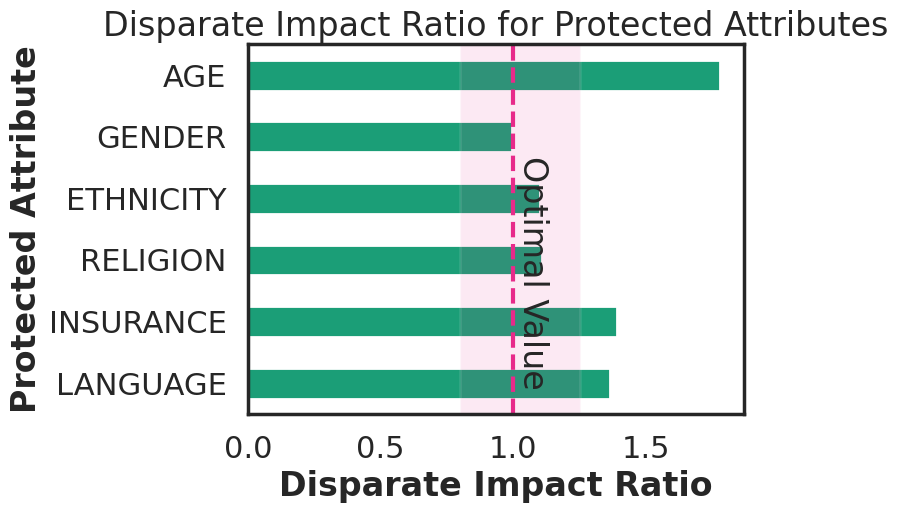

In [55]:
# plt.rcParams.update({'font.size': 15})
# plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
ax = bias_columns_metric[['protected_attribute', 'disparate_impact_ratio']].plot(kind='barh', colormap='Dark2')
ax.set_ylabel('Protected Attribute')
ax.set_xlabel('Disparate Impact Ratio')
ax.get_legend().remove()
ax.set_yticklabels(bias_columns_metric['protected_attribute'])

plt.axvline(x=1.0, color='#e72a8a', linestyle='--')
plt.axvspan(0.8, 1.25, facecolor='#e72a8a', alpha=0.1)
plt.text(1.01,0,'Optimal Value', rotation=270)
plt.title("Disparate Impact Ratio for Protected Attributes")
plt.savefig(os.path.join(image_folder, 'representationDIR.pdf'), format='pdf', bbox_inches="tight")
plt.savefig(os.path.join(image_folder, 'representationDIR.png'), bbox_inches="tight")
# plt.show()

**Note:** Disparate Impact Ratio (DIR) greater than 1 means that the privileged group has fewer positive mortality labels (fewer deaths) in the dataset compared to other groups. If DIR is greater than 1.25, then the dataset is considered biased/imbalanced, in a sense that some protected groups appear to have higher mortality than others. In some cased, e.g., AGE, that might be reasonable, while in others, e.g., LANGUAGE and INSURANCE type, it shouldn't be the case.
#### Test Set Predictions: Bias Assessment

In [56]:
test_listfile

,stay,y_true
0,10011_episode1_timeseries.csv,1
1,10026_episode1_timeseries.csv,0
2,10030_episode1_timeseries.csv,0
3,10042_episode1_timeseries.csv,0
4,10094_episode1_timeseries.csv,0
...,...,...
3231,9970_episode1_timeseries.csv,0
3232,9977_episode1_timeseries.csv,0
3233,99863_episode1_timeseries.csv,0
3234,99883_episode1_timeseries.csv,0


In [57]:
dataset = StandardDataset(test_listfile.drop(['stay'], axis=1),
                          label_name='y_true',
                          favorable_classes=[1],  # not a favorable outcome, but perhaps the most important
                          protected_attribute_names=protected_attributes,
                          privileged_classes=privileged_classes)

bias_columns_metric = pd.DataFrame(columns=['protected_attribute', 'mean_difference', 'disparate_impact_ratio'])
for attr in dataset.protected_attribute_names:
    print("\nEvaluating Outcome Bias for {}".format(attr))
    idx = dataset.protected_attribute_names.index(attr)
    privileged_groups = [{attr: dataset.privileged_protected_attributes[idx][0]}]
    unprivileged_groups = [{attr: dataset.unprivileged_protected_attributes[idx][0]}]

    metric_data = BinaryLabelDatasetMetric(dataset, unprivileged_groups=unprivileged_groups,
                                           privileged_groups=privileged_groups)
    bias_columns_metric.loc[len(bias_columns_metric.index)] = [attr, metric_data.mean_difference(), metric_data.disparate_impact()]
    print("Group Fairness - Mean Difference: {}".format(metric_data.mean_difference()))
    print("Group Fairness - Disparate Impact Ratio: {}".format(metric_data.disparate_impact()))
bias_columns_metric.head(10)

KeyError: 'ETHNICITY'

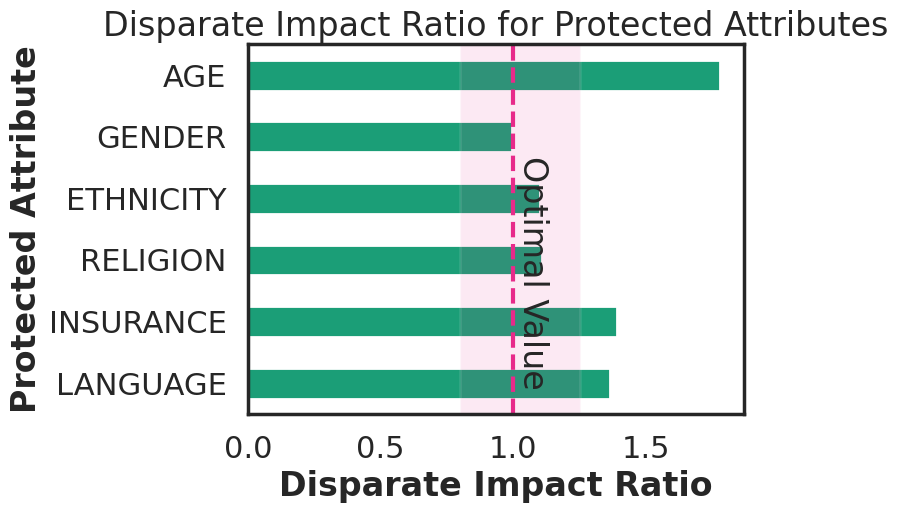

In [58]:
# plt.rcParams.update({'font.size': 15})
# plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
ax = bias_columns_metric[['protected_attribute', 'disparate_impact_ratio']].plot(kind='barh', colormap='Dark2')
ax.set_ylabel('Protected Attribute')
ax.set_xlabel('Disparate Impact Ratio')
ax.get_legend().remove()
ax.set_yticklabels(bias_columns_metric['protected_attribute'])

plt.axvline(x=1.0, color='#e72a8a', linestyle='--')
plt.axvspan(0.8, 1.25, facecolor='#e72a8a', alpha=0.1)
plt.text(1.01,0,'Optimal Value', rotation=270)
plt.title("Disparate Impact Ratio for Protected Attributes")
plt.savefig(os.path.join(image_folder, 'representationDIR.pdf'), format='pdf', bbox_inches="tight")
plt.savefig(os.path.join(image_folder, 'representationDIR.png'), bbox_inches="tight")
# plt.show()

### Model Biases
In this section, we assess biases in the predicted labels in the training, validation, and test data, or in the test data only.
**Interpretations:**
* Disparate Impact Ratio (Same with Statistical Parity Difference): How many users receive mortality predictions in the unprivileged group compared to the privileged group?
* False Positive Rate Ratio: From all the patients who did not eventually die, how many wrongfully received a mortality prediction?
* False Discovery Rate Ratio: TBA
* **False Negative Rate Ratio:** From all the patients who did die, how many had wrongfully received a non-mortality prediction?
* **False Omission Rate Ratio:** From all the patients who received a non-mortality prediction (rightfully or not), how many actually died?
* Error Rate Ratio: How many times was the mortality prediction model wrong?
* Equal Opportunity Difference: From all the patients who did eventually die, how many received a mortality prediction?
* Average Absolute Odds Difference: TBD

![image](metrictree.png)
#### Train-Validation-Test Set Predictions: Bias Assessment

In [59]:
# get predictions for df and test set
# Overall performance
train_predicted_labels = pd.Series(np.argmax(pretrained_model.predict(np_train[0]), axis=1))
val_predicted_labels = pd.Series(np.argmax(pretrained_model.predict(np_val[0]), axis=1))
test_predicted_labels = pd.Series(np.argmax(pretrained_model.predict(np_test[0]), axis=1))
df_predicted_labels = train_predicted_labels.append(val_predicted_labels).append(test_predicted_labels)
df_predicted_labels.reset_index(drop=True, inplace=True)
df.loc[:, 'y_pred'] = df_predicted_labels
df.head()

,y_true,SUBJECT_ID,LANGUAGE,INSURANCE,RELIGION,ETHNICITY,GENDER,AGE,y_pred
0,0,12797,ENGL,Medicare,JEWISH,WHITE,F,0,0
1,0,9027,NaN,Private,UNOBTAINABLE,UNKNOWN/NOT SPECIFIED,M,1,0
2,0,40386,ENGL,Medicare,PROTESTANT QUAKER,WHITE,F,0,0
3,0,48770,ENGL,Self Pay,NOT SPECIFIED,WHITE,M,1,0
4,0,14037,NaN,Private,CATHOLIC,WHITE,M,1,0


In [60]:
# Dataset containing predictions
for protected_attribute in protected_attributes:
    print("\n------------- ATTRIBUTE: {} -------------\n".format(protected_attribute))
    true_values, predictions = prepare_dataset_aif360(protected_attribute, df)
    metric_pred, classified_metric = aif360_model(true_values, predictions, protected_attribute, privileged_classes[protected_attributes.index(protected_attribute)], favorable_class=1)
    print_aif360_result(metric_pred, classified_metric)
    # evaluating in terms of accuracy
    print_aif360_accuracy_metrics(classified_metric)


------------- ATTRIBUTE: LANGUAGE -------------

statistical_parity_difference: 0.10062721842881786
disparate_impact: 1.4921668560751313
equal_opportunity_difference: 0.055067619950038726
average_absolute_odds_difference: 0.07144197420949813
error_rate_difference: 0.07610440335846957
error_rate_ratio: 1.427233879099246
false_discovery_rate_ratio: 1.0019992648824132
false_negative_rate_ratio: 0.849873657908827
false_omission_rate_ratio: 1.3295758861338334
false_positive_rate_ratio: 1.5577664253378067
true_positive_rate_difference: 0.055067619950038726
Privileged Group: {'TP': 744.0, 'FP': 1687.0, 'TN': 9028.0, 'FN': 431.0}
Unprivileged Group: {'TP': 170.0, 'FP': 388.0, 'TN': 1194.0, 'FN': 77.0}

Overall Accuracy: 0.8117209709162475
Privileged Group: 0.8218671152228764
Unprivileged Group: 0.7457627118644068

Overall Error Rate: 0.1882790290837525
Privileged Group: 0.17813288477712363
Unprivileged Group: 0.2542372881355932

------------- ATTRIBUTE: INSURANCE -------------

statistical_pa

#### Test Set Predictions: Bias Assessment

In [61]:
test_listfile

,stay,y_true
0,10011_episode1_timeseries.csv,1
1,10026_episode1_timeseries.csv,0
2,10030_episode1_timeseries.csv,0
3,10042_episode1_timeseries.csv,0
4,10094_episode1_timeseries.csv,0
...,...,...
3231,9970_episode1_timeseries.csv,0
3232,9977_episode1_timeseries.csv,0
3233,99863_episode1_timeseries.csv,0
3234,99883_episode1_timeseries.csv,0


In [62]:
# Dataset containing predictions
df_protected = []
df_metric = []
df_value = []

for protected_attribute in protected_attributes:
    print("\n------------- ATTRIBUTE: {} -------------\n".format(protected_attribute))
    true_values, predictions = prepare_dataset_aif360(protected_attribute, test_listfile)
    metric_pred, classified_metric = aif360_model(true_values, predictions, protected_attribute, privileged_classes[protected_attributes.index(protected_attribute)], favorable_class=1)
    fairness_metrics = print_aif360_result(metric_pred, classified_metric)
    df_protected = df_protected + [protected_attribute for x in range(len(fairness_metrics))]
    df_metric = df_metric + list(fairness_metrics.keys())
    df_value = df_value + list(fairness_metrics.values())
    # evaluating in terms of accuracy
    print_aif360_accuracy_metrics(classified_metric)
df_fairness_metrics = pd.DataFrame({'protected_attribute': df_protected, 'fairness_metric': df_metric, 'value': df_value, 'parameters': trainable_count, 'model_name': model_name, 'subfolder': subfolder, 'added_layers': added_layers, 'frozen_layers': frozen_layers, 'tag': tag})


------------- ATTRIBUTE: LANGUAGE -------------


KeyError: 'y_pred'

In [194]:
df_fairness_metrics

,protected_attribute,fairness_metric,value,parameters,model_name,subfolder,added_layers,frozen_layers,tag
0,LANGUAGE,statistical_parity_difference,0.094680,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
1,LANGUAGE,disparate_impact,1.489770,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
2,LANGUAGE,equal_opportunity_difference,0.030914,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
3,LANGUAGE,average_absolute_odds_difference,0.047812,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
4,LANGUAGE,error_rate_difference,0.065884,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
...,...,...,...,...,...,...,...,...,...
61,AGE,false_discovery_rate_ratio,0.821429,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
62,AGE,false_negative_rate_ratio,0.956522,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
63,AGE,false_omission_rate_ratio,1.648968,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
64,AGE,false_positive_rate_ratio,0.959501,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150


In [195]:
df_fairness_metrics.to_csv(os.path.join(working_directory, subfolder, model_name.replace('.hdf5', '_fairness_metrics.csv')), index=False)
df_fairness_metrics.head()

,protected_attribute,fairness_metric,value,parameters,model_name,subfolder,added_layers,frozen_layers,tag
0,LANGUAGE,statistical_parity_difference,0.094680,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
1,LANGUAGE,disparate_impact,1.489770,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
2,LANGUAGE,equal_opportunity_difference,0.030914,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
3,LANGUAGE,average_absolute_odds_difference,0.047812,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150
4,LANGUAGE,error_rate_difference,0.065884,153154,supervised.finetuned.0.58.hdf5,20231213-143305_l2_e100_esFalse_bs64_wTrue_ss150,2,,supervised150


**Test Set Findings:**
The discussion refers to the '20230306-101002_l2_hs128_e50_esFalse_bs16_wTrue' model.
* **Equal Opportunity Difference:** Values lower than 0 indicate that the model "catches" fewer mortality cases compared to all mortality cases in the unprivileged group compared to the privileged group. Values lower than -0.1 are considered biased against the unprivileged group and values above 0.1 against the privileged group. In our case, we notice that the model is biased against non-English speakers and non-Catholic patients. For non-white patients and patients older than 65 we have relatively acceptable scores. Focuses on True Positives (TP).
* **False Negative Rate Ratio:** From all those who did die, how many had received low mortality prediction? Values greater than 1 indicates that the model "misses" more deaths in the unprivileged group compared to the privileged group. Values lower than 0.8 are considered biased against the privileged group and values higher than 1.25 against the unprivileged group. In our case, we notice that the model is less likely to predict mortality for non-English speakers and non-Catholics. Focuses on False Negatives (FN).
* **False Omission Rate Ratio:** From all those who received a non-mortality prediction, how many actually died? Values larger than 1 indicate that the model "misses" more deaths in the unprivileged group compared to the privileged group. Values above 1.2 are considered biased. In our case, we notice bias against non-English speakers, non-privately insured patients, non-Catholics, non-White patients, and patients older than 65.

The above together showcase how the model does not predict mortality equally well for all groups (with a focus on false negatives), especially for non-English speakers and non-Catholics.

* **Disparate Impact Ratio (same for Statistical Parity):** Disparate Impact Ratio has an optimal value of 1.0 indicating parity. Values greater than 1 means that the privileged group has fewer predicted positive mortality labels (fewer predicted deaths) in the dataset compared to other groups. Values lower than 0.8 are considered biased against the privileged group (fewer 1's predicted), while values greater than 1.25 against the privileged group. Overall the model is equally likely to give a mortality prediction to all groups, regardless of demographics. Note that the mortality prediction is not necessarily correct as showcased earlier. Male patients are a borderline case, where the model seems to be less eager to assign mortality labels to them (DIR=1.19 indicating fewer 1's for the privileged class, i.e., Males). -> This is a tricky interpretation. What do we consider good, more predicted mortality or less predicted mortality? This metric is not tied to errors, so it's difficult to tell.

Does not directly translate to our use case.

* **False Positive Rate Ratio:** The optimal value is 1.0. Values lower than 0.8 indicate bias against the privileged group (more false positives), while values greater than 1.25 against the unprivileged group. In our case, we see that patients younger than 65 and females are receiving more mortality false positives compared to elderly and males, respectively. Both cases though are borderline non-biased.
* **False Discovery Rate Ratio:** No biases noticed.

FPs are not the problem; FNs are, and we are biased as seen through metrics incl. FNRR and FORR. Overall, I consider these metrics to cover a good range of issues related to fairness. Not sure about Disparate Impact, maybe error-based metrics are more appropriate in our use cases.